In [6]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

config_dir = "../config"
if config_dir not in sys.path:
    sys.path.insert(0, config_dir)

from config import add_to_path, root_dir, google_folder_id, download_dir
add_to_path(join(root_dir, 'src'))
import utils.preprocessing as preprocessing
from data_loader import load_data
import anomaly_detection.statistic as stat

Added to sys: c:\Users\Utilisateur\Desktop\reading_seminar\Application données\Code\Projet-recheche-INSA-anomaly-detection-librairy\src


# Méthodes statistiques de detection d'anomalie

1. Le Z-Score Glissant

In [7]:
data_dict, extracted_dir = load_data(
    file_id=google_folder_id,
    work_dir=join(download_dir, "gdrive_tar_data"),
    tar_name="data.tar",
    pattern="*.csv",
)

list_keys = list(data_dict.keys())
df = data_dict[list_keys[10]]
df = preprocessing.cleaning_dataframe(df)
df.describe()

INFO: 170 lines have been removed.
INFO: No lines with NaN values have been found.


,nwl1,nwl2,nwl3,nwl4,fprd1,fprd2,fprd3,fprd4,pstr1,pstr3,astrw,g2,ny,vcrf,v2
count,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.0,340.000000,340.000000,340.000000,340.000000,340.000000,340.0,340.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.309353,8.255882,0.508000,0.010706,0.234059,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057163,0.062558,0.071952,0.009086,0.095547,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.122750,8.108690,0.339887,-0.013892,-0.019795,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.278810,8.217010,0.453040,0.009867,0.206801,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.310030,8.260340,0.509616,0.009867,0.206801,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.341240,8.292840,0.558110,0.021747,0.274779,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.486900,8.422830,0.727840,0.033627,0.478715,0.0,0.0


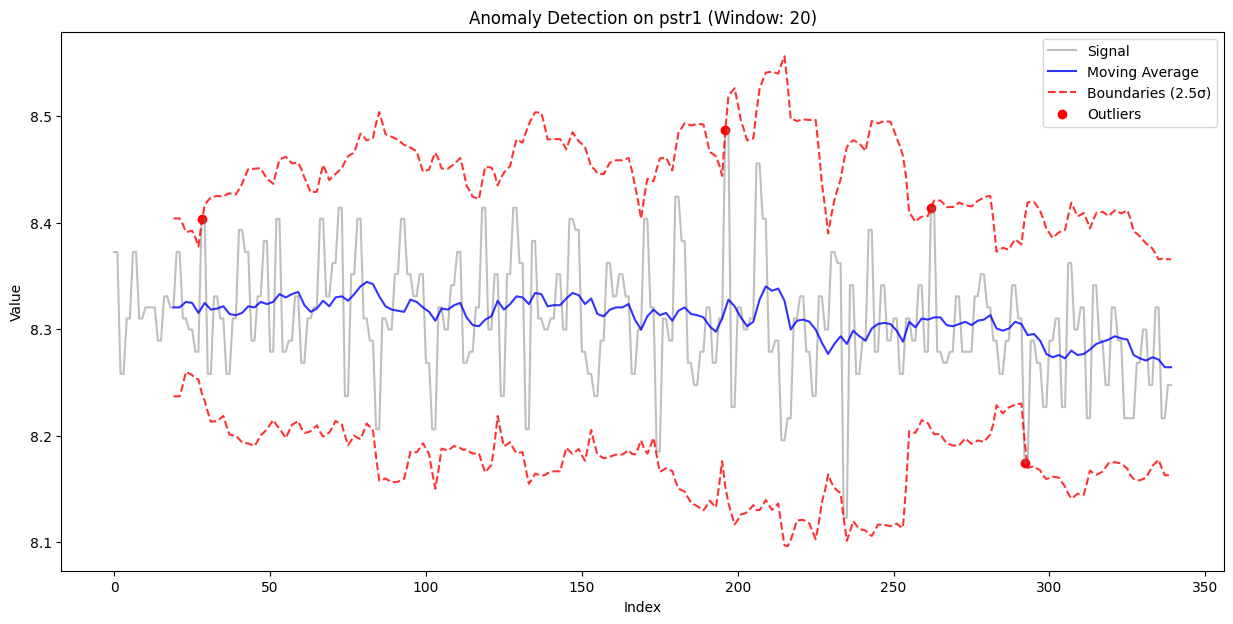

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Name: pstr1, Length: 340, dtype: bool


In [9]:
outlier_pstr1=stat.zscore_glissant(window_size=20,df_column=df['pstr1'],threshold=2.5)
print(outlier_pstr1)